In [1]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

import tensorflow as tf
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
plt.style.use('default')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

In [2]:
def getData(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    train_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_NaNmean.csv')
    X_train = train_data.drop(['Species'], axis = 1).values
    y_train = train_data[['Species']].copy().values
    valid_data = pd.read_csv('../data/' + save_folder + '/valid_data_NaNmean.csv')
    X_valid = valid_data.drop(['Species'], axis = 1).values
    y_valid = valid_data[['Species']].copy().values

    y_train = np.squeeze(y_train)
    n_values = np.max(y_train) + 1
    y_train = np.eye(n_values)[y_train]

    y_valid = np.squeeze(y_valid)
    n_values = np.max(y_valid) + 1
    y_valid = np.eye(n_values)[y_valid]
    return X_train, y_train, X_valid, y_valid

def getDataNormalization(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    train_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_Normalization.csv')
    #X_train = train_data.drop(['Species', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'], axis = 1).values
    X_train = train_data.drop(['Species'], axis = 1).values
    y_train = train_data[['Species']].copy().values
    valid_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_valid.csv')
    #X_valid = valid_data.drop(['Species', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'], axis = 1).values
    X_valid = valid_data.drop(['Species'], axis = 1).values
    y_valid = valid_data[['Species']].copy().values
    
    # label should be int
    y_train = np.floor(y_train + 1.1).astype(int)
    y_train = np.squeeze(y_train)
    n_values = np.max(y_train) + 1
    y_train = np.eye(n_values)[y_train]
    
    # label should be int
    y_valid = np.floor(y_valid + 1.1).astype(int)
    y_valid = np.squeeze(y_valid)
    n_values = np.max(y_valid) + 1
    y_valid = np.eye(n_values)[y_valid]
    return X_train, y_train, X_valid, y_valid

In [3]:
X_train, y_train, X_valid, y_valid = getDataNormalization(50)
tf.keras.backend.clear_session()
model = Sequential()

activation = 'relu'
model.add(Dense(16, input_shape=(7,), activation = activation, kernel_initializer=None, ))
model.add(BatchNormalization())
model.add(Dense(16, activation = activation))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax', name='output'))

optimizer = Adam(lr=0.1)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

history = model.fit(X_train,
    y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_valid, y_valid))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                128       
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 output (Dense)              (None, 3)                 51        
                                                                 
Total params: 579
Trainable params: 515
Non-trainable pa

f:\anaconda3\envs\tf\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


None
Epoch 1/100
4/4 [==============================] - 2s 199ms/step - loss: 0.8983 - accuracy: 0.5400 - val_loss: 0.2643 - val_accuracy: 0.8824
Epoch 2/100
4/4 [==============================] - 0s 28ms/step - loss: 0.1175 - accuracy: 0.9800 - val_loss: 0.8446 - val_accuracy: 0.8088
Epoch 3/100
4/4 [==============================] - 0s 35ms/step - loss: 0.0657 - accuracy: 0.9800 - val_loss: 0.2615 - val_accuracy: 0.8971
Epoch 4/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.1553 - val_accuracy: 0.9559
Epoch 5/100
4/4 [==============================] - 0s 26ms/step - loss: 0.1937 - accuracy: 0.9800 - val_loss: 0.1290 - val_accuracy: 0.9559
Epoch 6/100
4/4 [==============================] - 0s 34ms/step - loss: 0.0409 - accuracy: 1.0000 - val_loss: 0.1270 - val_accuracy: 0.9853
Epoch 7/100
4/4 [==============================] - 0s 42ms/step - loss: 0.0359 - accuracy: 1.0000 - val_loss: 0.0930 - val_accuracy: 0.9853
Epoch 8/100
4/

In [4]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((50, 7), (50, 3), (68, 7), (68, 3))

In [5]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((50, 7), (50, 3), (68, 7), (68, 3))

In [6]:
X_train

array([[ 1.39206105,  1.02151552, -0.01107447, -0.2652594 ,  1.29117612,
         1.75273728, -1.08911786],
       [ 0.67996266, -1.22110911,  1.16558801,  0.87319297, -0.75424151,
        -0.60882851,  0.78867155],
       [-0.89030557,  0.34872813, -1.39538328, -0.63525642,  0.84190876,
         0.5798402 ,  0.78867155],
       [ 2.19545409,  1.47004044,  0.40421817, -0.20833678,  1.76946374,
         1.51579281, -1.08911786],
       [ 0.5338912 ,  0.40479374, -0.42636711, -1.00525344,  1.8354091 ,
         1.43394748,  0.78867155],
       [ 0.44259653, -1.27717472,  1.37323434,  1.2716513 , -0.20895097,
        -1.64785169, -1.08911786],
       [ 0.2600072 , -0.77258418,  0.95794169,  1.2716513 , -0.28466535,
        -1.42073194, -1.08911786],
       [ 0.4791144 ,  0.79725305, -0.77244431, -0.83448559,  1.08186815,
         1.36961401,  0.78867155],
       [-1.41981462,  0.34872813, -0.42636711, -0.83448559,  0.40479442,
        -0.20654908,  0.78867155],
       [ 0.314784  , -1.9499

In [7]:
def runANN(activation, epochs, lr, X_train, y_train, X_valid, y_valid, norm = False):
    tf.keras.backend.clear_session()
    model = Sequential()
    model.add(Dense(16, input_shape=(7,), activation = activation))
    if norm:
        model.add(BatchNormalization())
    model.add(Dense(16, activation = activation))
    if norm:
        model.add(BatchNormalization())
    model.add(Dense(3, activation='softmax', name='output'))

    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    #print(model.summary())

    history = model.fit(X_train,
        y_train,
        epochs=epochs,
        batch_size=16,
        validation_data=(X_valid, y_valid))
    
    return history

In [8]:
X_train, y_train, X_valid, y_valid = getData(50)
his_1 = runANN('relu', 1000, 0.1, X_train, y_train, X_valid, y_valid)
# his_01 = runANN('relu', 1000, 0.01, X_train, y_train, X_valid, y_valid)
# his_001 = runANN('relu', 1000, 0.001, X_train, y_train, X_valid, y_valid)

Epoch 1/1000
4/4 [==============================] - 1s 81ms/step - loss: 2193.0361 - accuracy: 0.3000 - val_loss: 616.2654 - val_accuracy: 0.3676
Epoch 2/1000
4/4 [==============================] - 0s 25ms/step - loss: 299.1338 - accuracy: 0.2600 - val_loss: 57.5327 - val_accuracy: 0.4412
Epoch 3/1000
4/4 [==============================] - 0s 25ms/step - loss: 15.9201 - accuracy: 0.4200 - val_loss: 1.1174 - val_accuracy: 0.3676
Epoch 4/1000
4/4 [==============================] - 0s 26ms/step - loss: 1.1180 - accuracy: 0.3400 - val_loss: 1.1233 - val_accuracy: 0.3676
Epoch 5/1000
4/4 [==============================] - 0s 17ms/step - loss: 1.1272 - accuracy: 0.3400 - val_loss: 1.1192 - val_accuracy: 0.3676
Epoch 6/1000
4/4 [==============================] - 0s 36ms/step - loss: 1.1221 - accuracy: 0.3400 - val_loss: 1.1010 - val_accuracy: 0.3676
Epoch 7/1000
4/4 [==============================] - 0s 21ms/step - loss: 1.1062 - accuracy: 0.3400 - val_loss: 1.0745 - val_accuracy: 0.3676
Epoc

In [9]:
X_train, y_train, X_valid, y_valid = getDataNormalization(50)
his_1_norm = runANN('relu', 1000, 0.1, X_train, y_train, X_valid, y_valid, True)
# his_01_norm = runANN('relu', 1000, 0.01, X_train, y_train, X_valid, y_valid, True)
# his_001_norm = runANN('relu', 1000, 0.001, X_train, y_train, X_valid, y_valid, True)

Epoch 1/1000
4/4 [==============================] - 1s 91ms/step - loss: 0.7681 - accuracy: 0.6200 - val_loss: 0.2659 - val_accuracy: 0.9559
Epoch 2/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.2252 - accuracy: 0.9400 - val_loss: 1.0431 - val_accuracy: 0.7647
Epoch 3/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.1301 - accuracy: 0.9400 - val_loss: 2.3386 - val_accuracy: 0.5735
Epoch 4/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0547 - accuracy: 1.0000 - val_loss: 3.4093 - val_accuracy: 0.5588
Epoch 5/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.2440 - accuracy: 0.9600 - val_loss: 3.0946 - val_accuracy: 0.5735
Epoch 6/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0455 - accuracy: 1.0000 - val_loss: 2.5522 - val_accuracy: 0.5588
Epoch 7/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.0337 - accuracy: 1.0000 - val_loss: 2.3057 - val_accuracy: 0.5588
Epoch 8/1000


ValueError: x and y must have same first dimension, but have shapes (1000,) and (100,)

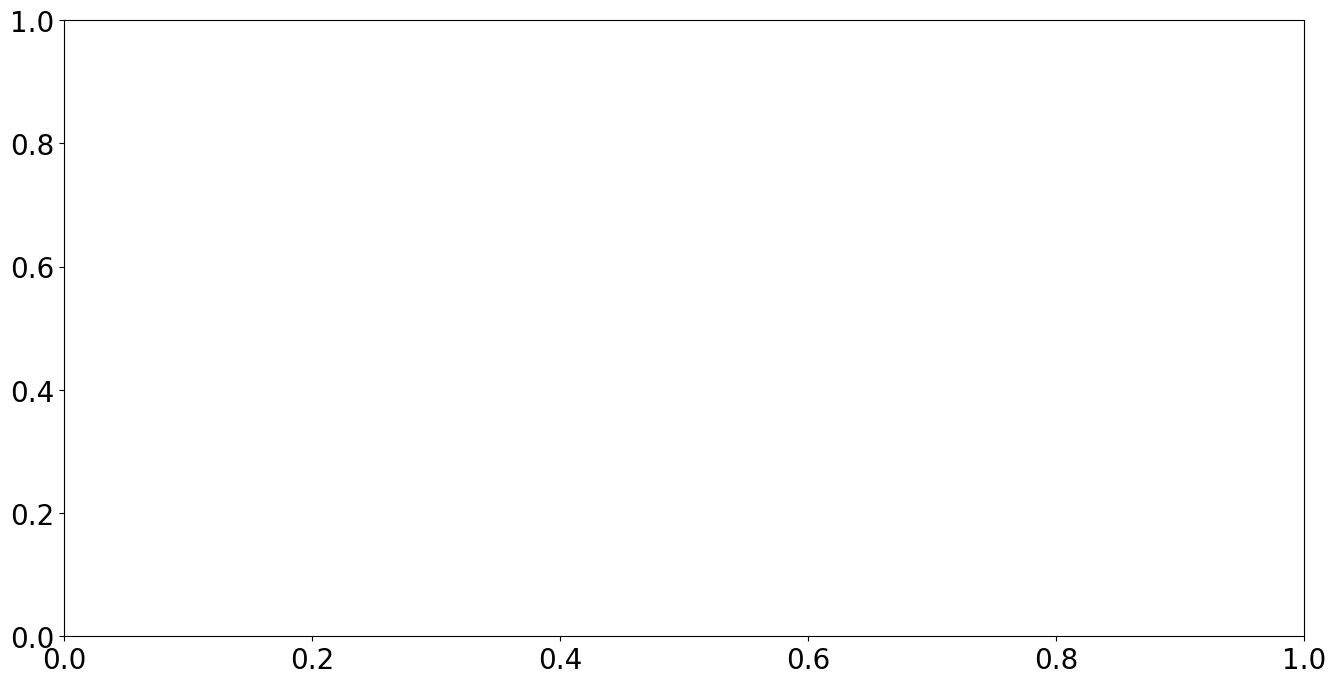

In [11]:
plt.rcParams['figure.figsize'] = [16, 8]
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, 1001)
#plt.plot(epochs, acc_values[::1], 'bo', label='Training loss')
plt.plot(epochs, val_acc_values[::1], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.ylim(0, 1.1)
#plt.xlim(0, 2000)
plt.legend()
plt.show()

In [12]:
def getAccResult(history):
    history_dict = history.history
    val_acc_values = history_dict['val_accuracy']
    print(max(val_acc_values), val_acc_values.index(max(val_acc_values)))

In [13]:
getAccResult(his_1)
# getAccResult(his_01)
# getAccResult(his_001)
getAccResult(his_1_norm)
# getAccResult(his_01_norm)
# getAccResult(his_001_norm)

0.44117647409439087 1
1.0 17


In [14]:
def getHisAcc(history):
    history_dict = history.history
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    return acc_values, val_acc_values

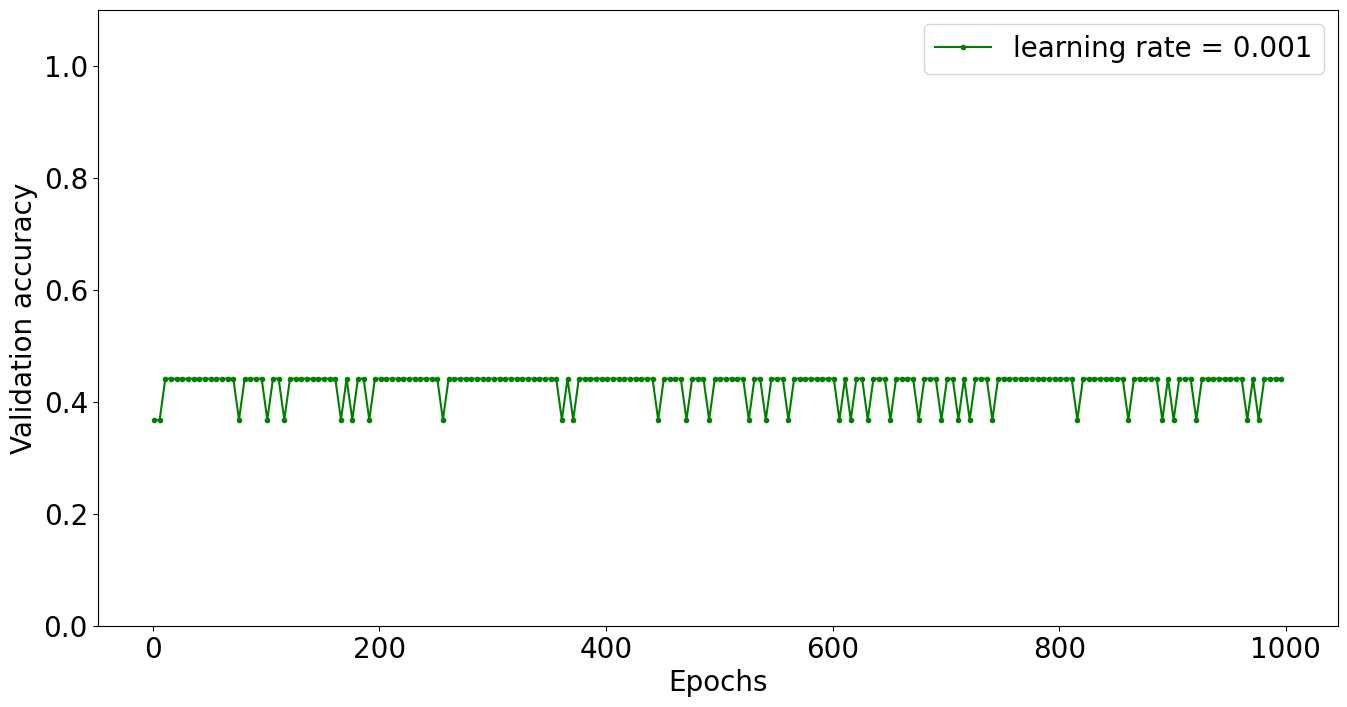

In [15]:
plt.rcParams['figure.figsize'] = [16, 8]
acc_values, val_acc_values = getHisAcc(his_1)
epochs = range(1, 1001, 5)
#plt.plot(epochs, acc_values[::1], 'bo', label='Training loss')
# plt.plot(epochs, val_acc_values[::5], 'orange', label='learning rate = 0.1', linestyle='dashed')
# acc_values, val_acc_values = getHisAcc(his_01)
# plt.plot(epochs, val_acc_values[::5], 'magenta', label='learning rate = 0.01')
# acc_values, val_acc_values = getHisAcc(his_001)
plt.plot(epochs, val_acc_values[::5], 'g', label='learning rate = 0.001', marker='.')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
#plt.yscale('log')
plt.ylim(0, 1.1)
#plt.xlim(0, 2000)
plt.legend()
plt.savefig('../pics/ANN/learning_rate_diff.svg', bbox_inches='tight')
plt.savefig('../pics/ANN/learning_rate_diff.pdf', bbox_inches='tight')
plt.show()

In [16]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
X_train.shape

(50, 7)

In [18]:
results = model.evaluate(X_test, y_test)
results

NameError: name 'X_test' is not defined

In [19]:
save_folder = 'train_0.5_valid_0.7_test'
pd.read_csv('../data/' + save_folder + '/train_data_' + str(50) + '_Normalization.csv')

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Sex,Species
0,1.392061,1.021516,-0.011074,-0.265259,1.291176,1.752737,-1.089118,0.0
1,0.679963,-1.221109,1.165588,0.873193,-0.754242,-0.608829,0.788672,1.0
2,-0.890306,0.348728,-1.395383,-0.635256,0.841909,0.579840,0.788672,-1.0
3,2.195454,1.470040,0.404218,-0.208337,1.769464,1.515793,-1.089118,0.0
4,0.533891,0.404794,-0.426367,-1.005253,1.835409,1.433947,0.788672,0.0
5,0.442597,-1.277175,1.373234,1.271651,-0.208951,-1.647852,-1.089118,1.0
6,0.260007,-0.772584,0.957942,1.271651,-0.284665,-1.420732,-1.089118,1.0
7,0.479114,0.797253,-0.772444,-0.834486,1.081868,1.369614,0.788672,0.0
8,-1.419815,0.348728,-0.426367,-0.834486,0.404794,-0.206549,0.788672,-1.0
9,0.314784,-1.949962,0.888726,0.531657,-1.686314,0.307420,0.788672,1.0


In [20]:
pd.read_csv('../data/' + save_folder + '/train_data_' + str(50) + '_valid.csv')

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Sex,Species
0,-1.328520,-0.324059,-1.395383,-1.517557,0.647604,-0.329420,0.788672,-1.0
1,-1.511109,-0.548322,-0.426367,-0.948331,-0.278858,-0.430613,0.788672,-1.0
2,-0.762493,0.909384,-0.772444,0.474735,1.386608,2.108277,-1.089118,-1.0
3,-0.214725,-1.949962,0.819511,0.873193,-1.341028,-1.464155,0.788672,1.0
4,0.734739,-1.221109,0.957942,1.670110,-1.423070,0.215572,-1.089118,1.0
...,...,...,...,...,...,...,...,...
63,-0.525127,-1.949962,0.888726,0.531657,-0.935139,0.339621,0.788672,1.0
64,0.552150,-0.380125,-0.841660,-0.606795,1.672598,1.588978,0.788672,0.0
65,-0.926823,1.021516,-0.426367,-0.834486,0.838503,0.786858,0.788672,-1.0
66,-0.178207,-1.669634,0.542649,0.588580,-1.941204,0.243744,0.788672,1.0
